In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/GauravChoudhay/K_MEANS/main/php50jXam.csv')

In [ ]:
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [ ]:
df.shape

(1372, 5)

In [ ]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


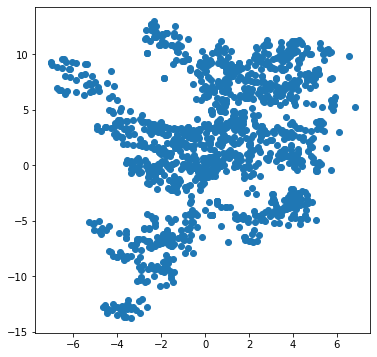

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[6,6])
plt.scatter(df.V1,df.V2)
plt.show()

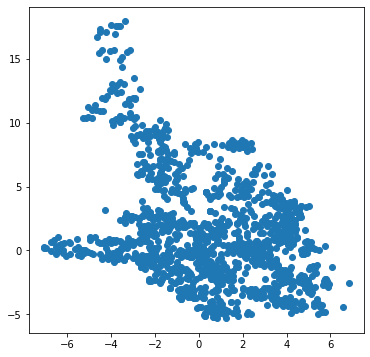

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df.V1,df.V3)
plt.show()

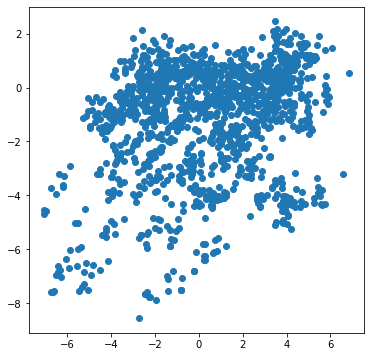

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df.V1,df.V4)
plt.show()

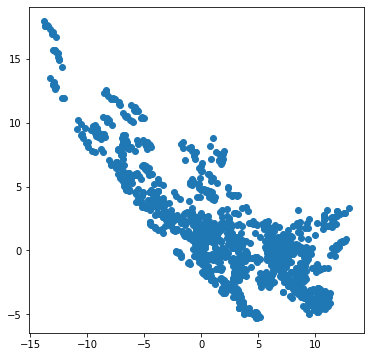

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df.V2,df.V3)
plt.show()

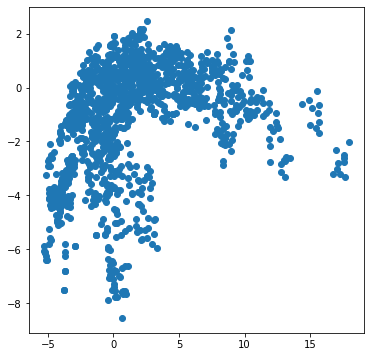

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df.V3,df.V4)
plt.show()

In [ ]:
data=df[['V1','V2']]
data.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


**K-Means**

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km_res=km.fit(data)

In [33]:
df['KMeans']=km_res.labels_
#output khud se bana deta hai ye
km_res.labels_

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
centroid=km_res.cluster_centers_
#isse coordinates of cluster center milta h

In [ ]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


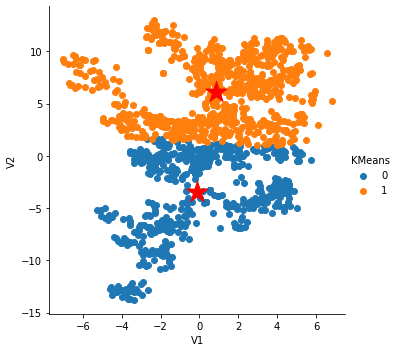

In [34]:
fig=sb.FacetGrid(data=df,hue='KMeans',size=5)
fig.map(plt.scatter,'V1','V2')
fig.add_legend();
plt.scatter(centroid[:,0],centroid[:,1],s=500,marker="*",c="r")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'K-means classification')

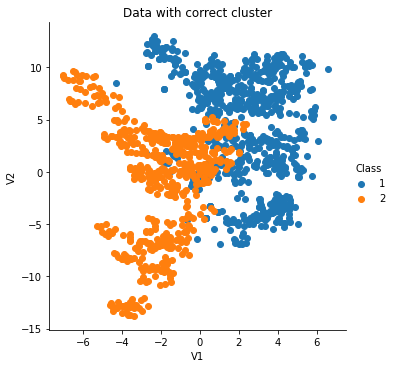

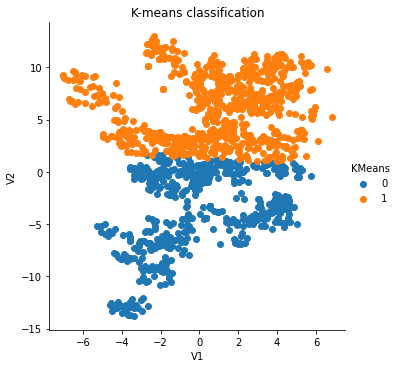

In [37]:
fig=sb.FacetGrid(data=df,hue='Class',size=5)
fig.map(plt.scatter,'V1','V2')
fig.add_legend();
plt.title("Data with correct cluster")

fig=sb.FacetGrid(data=df,hue='KMeans',size=5)
fig.map(plt.scatter,'V1','V2')
fig.add_legend();
plt.title("K-means classification")


In [38]:
df['KMeans'] = df['KMeans'].map({0:1,1:2})

In [44]:
correct=0
for i in range(0,1372):
  if df.Class[i]==df['KMeans'][i]:
    correct+=1
print(correct/1372)

0.34766763848396504
